# Bank Customer Satisfaction Prediction Using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPool1D,Dropout,BatchNormalization
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets,metrics

In [4]:
data = pd.read_csv('samtander_train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
data.shape

(76020, 371)

In [6]:
x = data.drop(labels=['ID','TARGET'],axis=1)

In [7]:
y = data['TARGET']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

### Remove Constant,Quasi Constanta and duplicate features

* there is a high chance of feature duplicate present when there are so many features,there we need to remove duplicates
* in some columns there may be very less variance i.e less than 1%,such columns are of no use as they will not contain much information
* constants does not contain any information for example a feature with all values 0

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
filter = VarianceThreshold(0.01)
x_train = filter.fit_transform(x_train)
x_test = filter.transform(x_test)

In [12]:
x_train.shape,x_test.shape

((60816, 273), (15204, 273))

In [13]:
369-273 #total number of features removed

96

In [14]:
x_train_T = x_train.T  #we are doing transpose for carrying out drop_duplicate operation on rows which are previosly columns
x_test_T =x_test.T

In [15]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [16]:
x_test_T.shape

(273, 15204)

In [17]:
x_train_T.duplicated().sum() #number of duplicate features


17

In [18]:
duplicated_features = x_train_T.duplicated()

In [19]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [20]:
features_to_keep = [not index for index in duplicated_features] #doing inversion, to convert false into true
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [21]:
x_train =x_train_T[features_to_keep].T   #to get the data like it was before applying transpose
x_test = x_test_T[features_to_keep].T

In [22]:
x_train.shape,x_test.shape

((60816, 256), (15204, 256))

### Standardization

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train.shape

(60816, 256)

In [25]:
x_train = x_train.reshape(60816,256,1)  #as CNN model require 3D data
x_test = x_test.reshape(15204,256,1)

In [26]:
y_train = y_train.to_numpy()   #as y was in series we need to convert it into numpy array
y_test = y_test.to_numpy()

# Build CNN

In [27]:
model = Sequential()
model.add(Conv1D(32, activation='relu',kernel_size=3,input_shape=(256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, activation='relu',kernel_size=3))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, activation='relu',kernel_size=3))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units =256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [29]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
1901/1901 [==============================] - 69s 36ms/step - loss: 0.2278 - accuracy: 0.9509 - val_loss: 0.1911 - val_accuracy: 0.9604
Epoch 2/10
1901/1901 [==============================] - 69s 36ms/step - loss: 0.1778 - accuracy: 0.9593 - val_loss: 0.1835 - val_accuracy: 0.9602
Epoch 3/10
1901/1901 [==============================] - 69s 36ms/step - loss: 0.1685 - accuracy: 0.9601 - val_loss: 0.1727 - val_accuracy: 0.9604
Epoch 4/10
1901/1901 [==============================] - 70s 37ms/step - loss: 0.1662 - accuracy: 0.9602 - val_loss: 0.1711 - val_accuracy: 0.9603
Epoch 5/10
1901/1901 [==============================] - 71s 37ms/step - loss: 0.1609 - accuracy: 0.9604 - val_loss: 0.1763 - val_accuracy: 0.9603
Epoch 6/10
1901/1901 [==============================] - 73s 38ms/step - loss: 0.1601 - accuracy: 0.9604 - val_loss: 0.1628 - val_accuracy: 0.9603
Epoch 7/10
1901/1901 [==============================] - 75s 39ms/step - loss: 0.1564 - accuracy: 0.9604 - val_loss: 0.1624 -

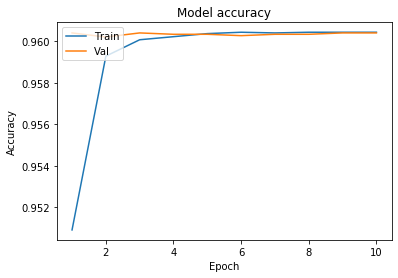

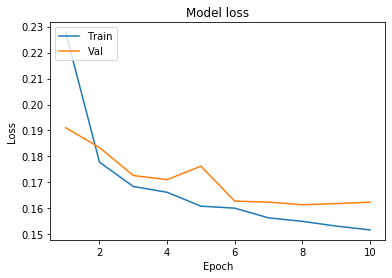

In [31]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### we have got a good accuracy and our model is neither underfit nor overfit